# Thomas Dansereau

## Our research question for this project is:
Can we use movements in the NASDAQ Composite Index (equity financial markets) to predict movements in Etherium cryptocurrency markets. 


NASDAQ DATASET: 

In [220]:
import pandas as pd
import seaborn as sns
import numpy as np
import os
import matplotlib.pyplot as plt

nas = pd.read_csv("https://query1.finance.yahoo.com/v7/finance/download/%5EIXIC?period1=1567296000&period2=1630454400&interval=1d&events=history&includeAdjustedClose=true")
print ("Here is the basic raw NASDAQ Data")
nas.head()

Here is the basic raw NASDAQ Data


,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-09-03,7906.439941,7940.370117,7847.319824,7874.160156,7874.160156,1936210000
1,2019-09-04,7949.810059,7981.410156,7928.939941,7976.879883,7976.879883,1891300000
2,2019-09-05,8061.290039,8134.419922,8061.290039,8116.830078,8116.830078,2096300000
3,2019-09-06,8125.580078,8134.390137,8098.520020,8103.069824,8103.069824,1876380000
4,2019-09-09,8130.910156,8131.660156,8052.339844,8087.439941,8087.439941,2172240000


In [221]:
eth = pd.read_csv("https://query1.finance.yahoo.com/v7/finance/download/ETH-USD?period1=1567296000&period2=1630454400&interval=1d&events=history&includeAdjustedClose=true")
print ("Here is the basic raw Ethereum Data")
eth.head()

Here is the basic raw Ethereum Data


,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-09-01,172.458405,173.696854,169.531281,171.629425,171.629425,5.554800e+09
1,2019-09-02,171.697601,180.145218,170.451691,178.347351,178.347351,6.503447e+09
2,2019-09-03,178.357758,182.347992,175.970169,179.499329,179.499329,6.962729e+09
3,2019-09-04,179.491989,180.136597,175.325363,175.992889,175.992889,5.938120e+09
4,2019-09-05,175.966278,176.163910,171.746826,174.217133,174.217133,5.589477e+09


EDA For Nasdaq Composite V1
EDA For Nasdaq Composite V2


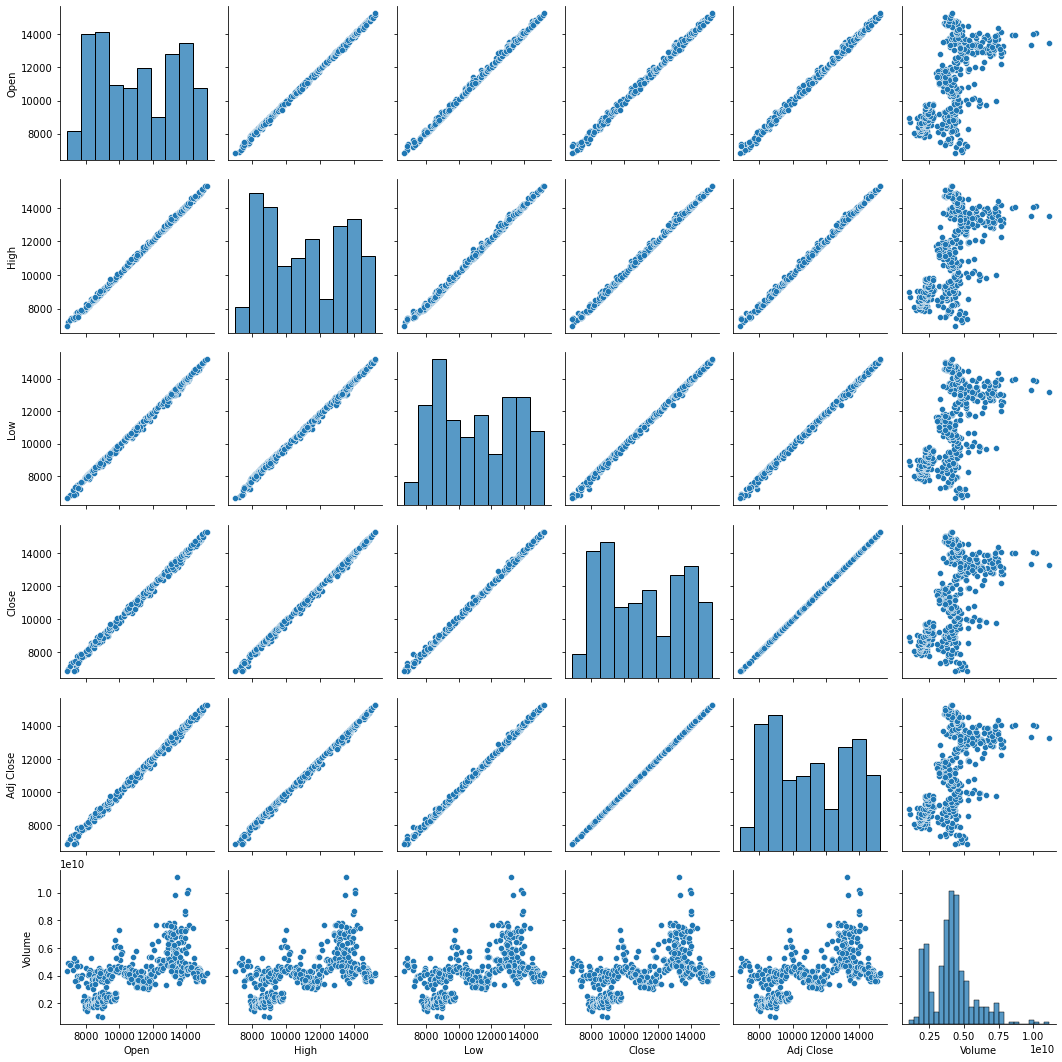

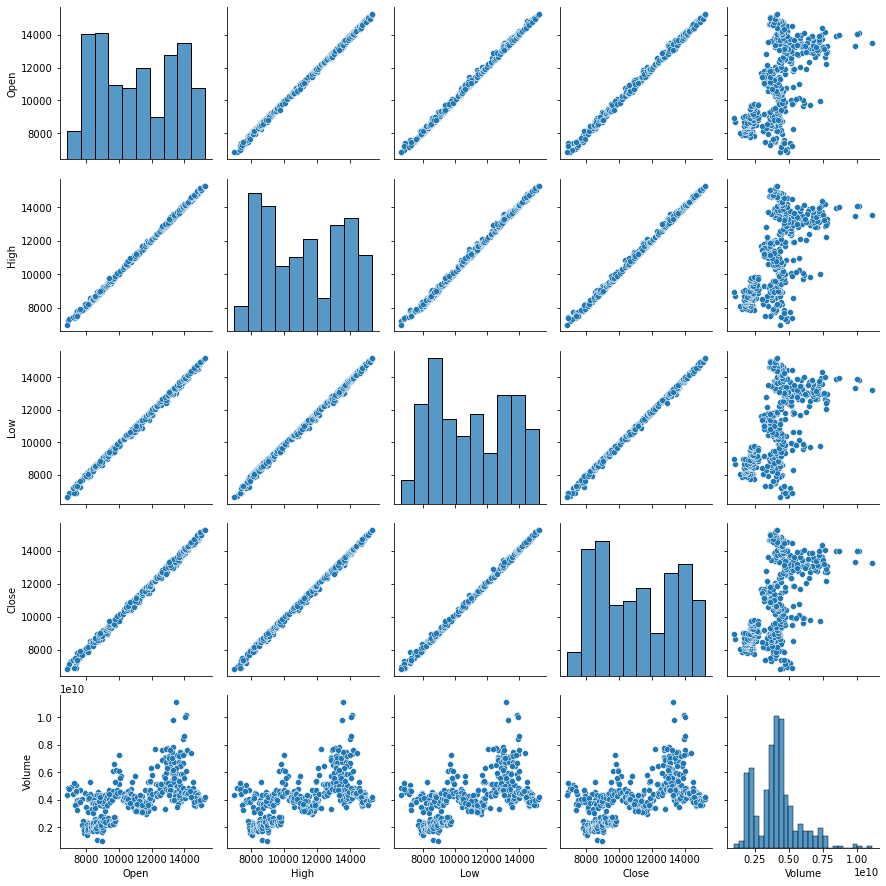

In [212]:
dfN = pd.read_csv("https://query1.finance.yahoo.com/v7/finance/download/%5EIXIC?period1=1567296000&period2=1630454400&interval=1d&events=history&includeAdjustedClose=true")

print("EDA For Nasdaq Composite V1")
g = sns.pairplot(dfN)

print("EDA For Nasdaq Composite V2")
h=sns.pairplot(dfNQ_cleaned)

In [213]:
dfN = pd.read_csv("https://query1.finance.yahoo.com/v7/finance/download/%5EIXIC?period1=1567296000&period2=1630454400&interval=1d&events=history&includeAdjustedClose=true")

dfN.nunique(axis=0)

dfN.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))


,Open,High,Low,Close,Adj Close,Volume
count,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000
mean,11115.110351,11193.235924,11028.457260,11119.870588,11119.870588,4080611448.412698
std,2344.881209,2343.208010,2339.502736,2343.964758,2343.964758,1527821971.186254
min,6847.279785,6984.939941,6631.419922,6860.669922,6860.669922,1014520000.000000
25%,8901.939697,8957.000000,8821.139893,8939.029785,8939.029785,3192547500.000000
50%,11053.354981,11127.924804,10966.930175,11030.899903,11030.899903,4061960000.000000
75%,13351.057617,13486.367432,13272.547608,13399.467529,13399.467529,4670025000.000000
max,15262.879883,15288.080078,15202.669922,15265.889648,15265.889648,11102160000.000000


In [215]:
dfN_cleaned = dfN.copy().drop(['Adj Close'], axis=1)

dfNQ_cleaned = dfN_cleaned.dropna(axis=0)

#dfN.columns

#dfN_cleaned.shape

#dfNQ_cleaned.shape

#dfNQ_cleaned.head(10)

dfNQ_cleaned.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,Open,High,Low,Close,Volume
count,504.000000,504.000000,504.000000,504.000000,504.000000
mean,11115.110351,11193.235924,11028.457260,11119.870588,4080611448.412698
std,2344.881209,2343.208010,2339.502736,2343.964758,1527821971.186254
min,6847.279785,6984.939941,6631.419922,6860.669922,1014520000.000000
25%,8901.939697,8957.000000,8821.139893,8939.029785,3192547500.000000
50%,11053.354981,11127.924804,10966.930175,11030.899903,4061960000.000000
75%,13351.057617,13486.367432,13272.547608,13399.467529,4670025000.000000
max,15262.879883,15288.080078,15202.669922,15265.889648,11102160000.000000


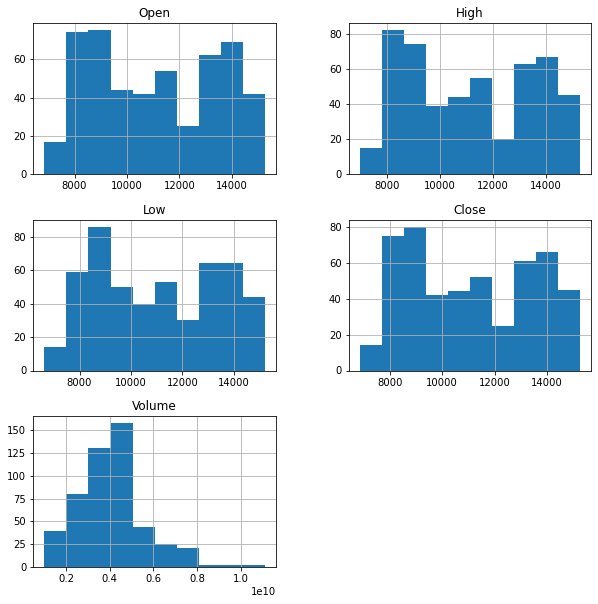

In [75]:
dfNQ_cleaned.describe().T

hist = dfNQ_cleaned.hist(bins=10,figsize =(10,10))


<AxesSubplot:ylabel='Frequency'>

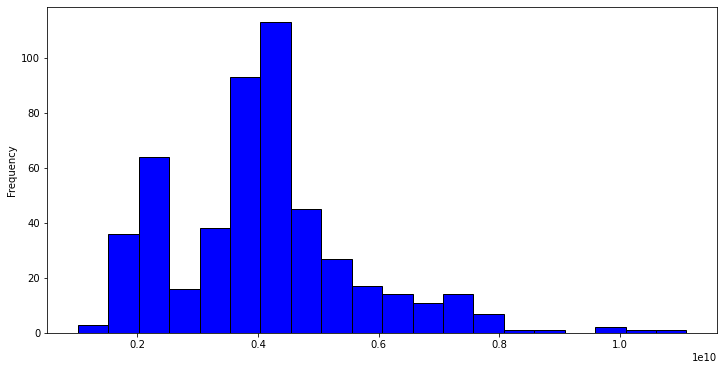

In [216]:
dfNQ_cleaned['Volume'].plot(kind='hist', bins=20, figsize=(12,6), facecolor='blue',edgecolor='black')

The columns in this data set are Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object').


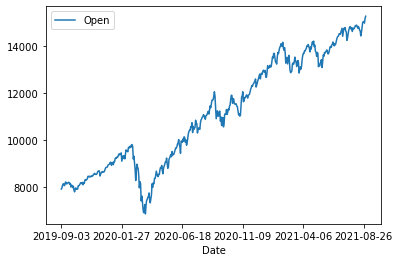

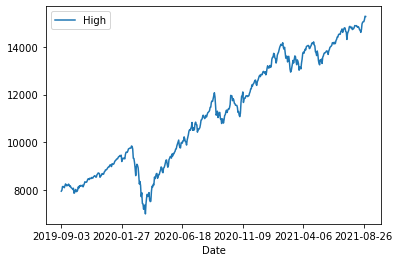

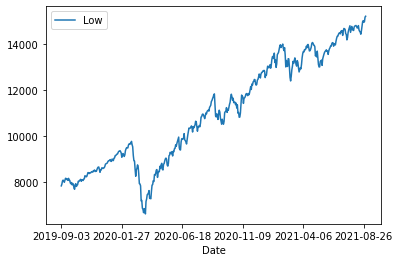

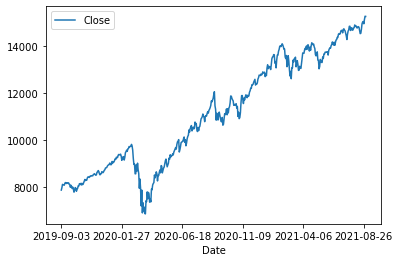

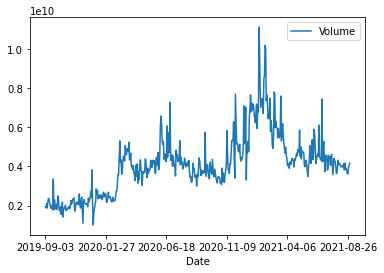

In [217]:
columns = dfNQ_cleaned.columns

print(f'The columns in this data set are {columns}.')


dfNASDAQ = (dfNQ_cleaned.plot(x='Date', y='Open'), dfNQ_cleaned.plot(x='Date', y='High'),  dfNQ_cleaned.plot(x='Date', y='Low'),  dfNQ_cleaned.plot(x='Date', y='Close'),  dfNQ_cleaned.plot(x='Date', y='Volume'))



In [218]:
columns = dfNQ_cleaned[['Open', 'High', 'Low', 'Close', 'Volume']]
start = dt.datetime(2020, 9, 3)

data = dfN['Date']

log_returns = np.log(columns/columns.shift())

log_returns.corr()


,Open,High,Low,Close,Volume
Open,1.000000,0.844527,0.742054,0.401308,0.087883
High,0.844527,1.000000,0.844112,0.684741,0.051567
Low,0.742054,0.844112,1.000000,0.730907,-0.142279
Close,0.401308,0.684741,0.730907,1.000000,-0.145215
Volume,0.087883,0.051567,-0.142279,-0.145215,1.000000


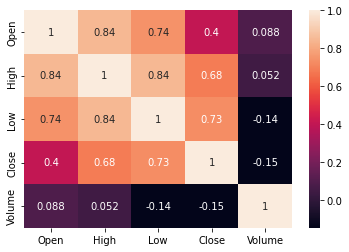

In [219]:
columns = dfNQ_cleaned[['Open', 'High', 'Low', 'Close', 'Volume']]

data = log_returns = np.log(columns/columns.shift())

sns.heatmap(data.corr(), annot=True);


In [191]:
print("Task 2")

Task 2


In [197]:
print("My Data Analysis Pipeline")
print (" ")
print ("Come back to later... Required for Milestone 3 Task 2")
print (" ")
print("My dataframes: dfN = all the data for NASDAQ Composite, dfN_cleaned = all nasdaq data without 'Adj Close' values, dfNQ_cleaned = all nasdaq data with 'Adj Close' values and also with null values removed (didnt change anything as there were no null values in dataset), dfNASDAQ = all individual line graphs with x values as time and varying y values,")
print (" ")
print ("Steps I have done so far: 1) create dataframes for original NASDAQ dataset, 2) use these dataframes to create multiple visuals / graphs each showing the original dataset in a different way, 3) use the original data to find correlation between variables between the column variables, 4) went back to the datasets I created at the start and removed redundant ones that were not significant in ultimately showing corrleation and that would not help me to answer my overall question on the datasets and also organized the order of datasets and charts / visuals I created to make analyzing them simpler")
print (" ")
print ("Additional comments / concerns : ... ")

My Data Analysis Pipeline
 
Come back to later... Required for Milestone 3 Task 2
 
My dataframes: dfN = all the data for NASDAQ Composite, dfN_cleaned = all nasdaq data without 'Adj Close' values, dfNQ_cleaned = all nasdaq data with 'Adj Close' values and also with null values removed (didnt change anything as there were no null values in dataset), dfNASDAQ = all individual line graphs with x values as time and varying y values,
 
Steps I have done so far: 1) create dataframes for original NASDAQ dataset, 2) use these dataframes to create multiple visuals / graphs each showing the original dataset in a different way, 3) use the original data to find correlation between variables between the column variables, 4) went back to the datasets I created at the start and removed redundant ones that were not significant in ultimately showing corrleation and that would not help me to answer my overall question on the datasets and also organized the order of datasets and charts / visuals I creat

In [156]:
print("Task 3")

Task 3


In [236]:
df = (   
    pd.DataFrame(data.data,columns=data.feature_names)
    .rename(columns={"color_intensity": "ci"})
    .assign(color_filter=lambda x: np.where((x.hue > 1) & (x.ci > 7), 1, 0))
    .loc[lambda x: x['alcohol']>14]
    .sort_values("alcohol", ascending=False)
    .reset_index(drop=True)
    .loc[:, ["alcohol", "ci", "hue"]]
)


AttributeError: 'DataFrame' object has no attribute 'data'

In [260]:
nas = pd.read_csv("https://query1.finance.yahoo.com/v7/finance/download/%5EIXIC?period1=1567296000&period2=1630454400&interval=1d&events=history&includeAdjustedClose=true")

#nas.head()

##df = (nas.nunique(axis=0).drop(['Adj Close']))

##df.head()


df = (nas.copy().drop(['Adj Close'], axis=1).dropna(axis=0))

df.head(10)
    
    

,Date,Open,High,Low,Close,Volume
0,2019-09-03,7906.439941,7940.370117,7847.319824,7874.160156,1936210000
1,2019-09-04,7949.810059,7981.410156,7928.939941,7976.879883,1891300000
2,2019-09-05,8061.290039,8134.419922,8061.290039,8116.830078,2096300000
3,2019-09-06,8125.580078,8134.390137,8098.520020,8103.069824,1876380000
4,2019-09-09,8130.910156,8131.660156,8052.339844,8087.439941,2172240000
5,2019-09-10,8049.979980,8086.529785,8001.680176,8084.160156,2362860000
6,2019-09-11,8091.680176,8169.680176,8081.560059,8169.680176,2310440000
7,2019-09-12,8206.580078,8243.799805,8176.729980,8194.469727,2159260000
8,2019-09-13,8190.569824,8210.200195,8165.470215,8176.709961,1976770000
9,2019-09-16,8121.640137,8165.330078,8121.250000,8153.540039,1869220000
